<a href="https://colab.research.google.com/github/lukesilvs/GoogleColab/blob/master/CelsiusToFarenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies
*   import TensorFlow as tf. Also telling Tensorflow to only display errors*
*   import Numpy as np. Using Numpy to represent the data as highly performant lists*



In [29]:
import tensorflow as tf

In [30]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
# The numpy. log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements

# Set Up Training Data
Creating a model that can give an output in Farenheit when given an input of celsius. Accomplish this by creating two lists: *celsius_q* and *farenheit_a* that will be used to train the model

In [31]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenheit_a = np.array([-40, -14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees celsius = {} degrees farenheit".format(c, farenheit_a[i])) #Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.

-40.0 degrees celsius = -40.0 degrees farenheit
-10.0 degrees celsius = -14.0 degrees farenheit
0.0 degrees celsius = 32.0 degrees farenheit
8.0 degrees celsius = 46.0 degrees farenheit
15.0 degrees celsius = 59.0 degrees farenheit
22.0 degrees celsius = 72.0 degrees farenheit
38.0 degrees celsius = 100.0 degrees farenheit


# Create The Model
We will be using a dense network which is the simplest model that can be used for the problem. The problem is straightforward and the network will only require a single layer and neuron
## Build a layer
Start by labling the layer as l0 and creiting it by instantiating *tf.keras.layers.Dense* with the following configuration


*   input_shape = [1] - This specifies that the input to this layer is a single value. The shape is a 1 dimensional array with 1 member. As this is the only layer it is the input shape of the entire model. The single value is a floating point number representing degrees celsius.
*   units = 1 - This specifies the number of neurons in the layer. **The number of neurons defines how many variables the layer has to solve the problem**. Since this is the final layer, it is also the size of the models output- a single float value representing degrees farenheit. **(in a multilayered network, the size and shape of the layer would need to match the *input_shape* of the next layer)**



In [32]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble Layers Into The Model
Once Layers are defined they need to be assembled into a model. The Sequential model takes a list of layers as an argument, specifying the calculation order from the input to the output

This Model has the single layer l0.

In [33]:
model = tf.keras.Sequential([l0]) 

**Note**
Ive defined the layers before the model but theyre often defined inside the model definition

In [34]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

## Compile the model with loss and optimizer functions

*   **Loss Function** - Measures how far off predictions are from the desired outcome. (measured difference is called the loss)
*   **Optimizer Function** - A way of adjusting internal values to reduce the loss^




In [35]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

These are used during the training of the model (model.fit(), bellow) to calculate the loss at each point and improve it. Trainig is the act of calculating the current loss of a model and improving it.


---


*   Optomizer adjusts internal variables untill they mirror the actual equation
*   Loss Function is mean squared error and the optimiser is Adam



---
**Important to note with the optimizer**: When building a model you need to take the learning rate into account. This is the steop size taken when adjusting the model, its been set to 0.1 in the example above. Too small- it will take to many iterations to build the model. Too Large- reduced accuracy. Finding a good value involves trial and error but the range is generally between 0.001(default) and 0.1.







## Train The Model
Model is trained by calling the *fit* method
**finish this in am im getting tired lol** also what the difference between ' and "



In [36]:
history = model.fit(celsius_q, farenheit_a, epochs=500, verbose=False)
print("Finished Training the Model!")

Finished Training the Model!


## Display Training Statistics

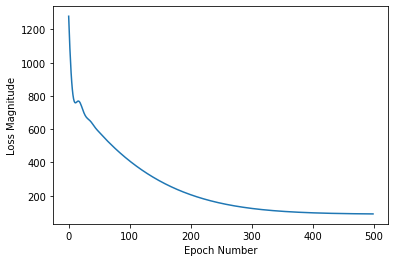

In [37]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


## Use the model to predict values

In [38]:
print(model.predict([100.0]))

[[217.99648]]


## Looking at the Layer Weights

In [39]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[-1.5749754]], dtype=float32), array([0.], dtype=float32)]
